<a href="https://colab.research.google.com/github/RemyaRS/Machine_Learning_Case_Studies/blob/main/ML2_Classification_and_Analysis_of_Water_Quality_Using_MachineLearning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#for complex mathematical operations
import numpy as np 

#for dataframe manipulation
import pandas as pd

# for data visulisation
import seaborn as sns
import matplotlib.pyplot as plt

#for interactive analysis
from ipywidgets import interact

#for implementing complex machine learning algorithm use sklearn

#from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Source of Dataset : Kerala State Pollution Control Board Data
https://www.keralapcb.nic.in/cmsadmin/fileUploads/PCB%202020-water_and_air_directory.pdf

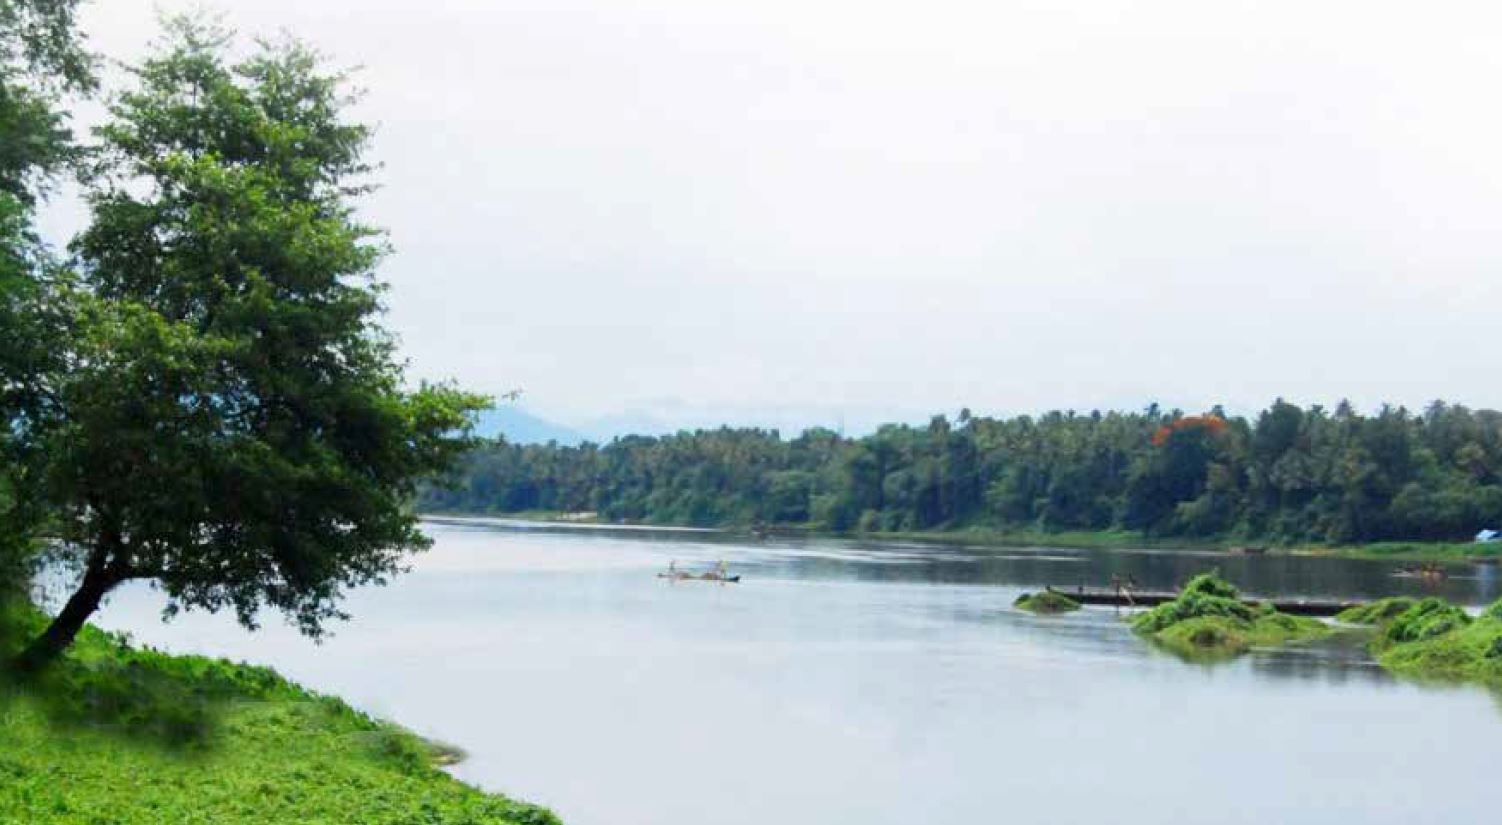

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/newkpcbclasswise.csv", encoding = 'unicode_escape')

Dataframe is a data structure having some rows and coloumns

Coloumns of dataframe may have data of different datatypes

Shape of dataset tells the number of rows and coloumns

In [ ]:
print("Shape of Dataset:" , data.shape)

Shape of Dataset: (220, 15)


In [ ]:
data.head()

,Source,Stations,ph_max,ph_min,EC_max_µmhos/cm,EC_min_µmhos/cm,DO_max,DO_min_mg/l,BOD_max_mg/l,BOD_min_mg/l,TC_max_MPN/100ml,TC_min_MPN/100ml,FC_max_MPN/100ml,FC_min_MPN/100ml,CLASS
0,KADALUNDI RIVER,Oravambrum,7.5,6.5,138,42,8.7,4.0,3.9,0.6,80,12,40,4,A
1,KADALUNDI RIVER,Anakkayam,7.3,6.3,117,57,9.2,5.3,4.4,0.6,72,8,40,4,A
2,KADALUNDI RIVER,Hajiyarappally,7.6,6.5,140,60,8.3,4.6,2.1,0.6,61,20,40,4,A
3,KADALUNDI RIVER,Manikuth,7.4,6.3,117,59,9.0,3.5,2.6,1.2,60,12,28,12,A
4,KADALUNDI RIVER,Kooriyad,7.4,6.5,145,63,8.6,4.0,4.4,0.8,49,12,28,6,A


#DATASET CLEANING

In [ ]:
#Since missing values should not be present for a better machine learning ...find the missing value is present or not
data.isnull().sum()

Source              0
Stations            0
ph_max              0
ph_min              0
EC_max_µmhos/cm     0
EC_min_µmhos/cm     0
DO_max              0
DO_min_mg/l         0
BOD_max_mg/l        0
BOD_min_mg/l        0
TC_max_MPN/100ml    0
TC_min_MPN/100ml    0
FC_max_MPN/100ml    0
FC_min_MPN/100ml    0
CLASS               0
dtype: int64

No missing values present

In [ ]:
data['CLASS'].value_counts()

B          82
C          75
Below E    25
D          15
E          15
A           8
Name: CLASS, dtype: int64

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
# Separate majority and minority classes
data_majority = data[data.CLASS=='B']
data_minority_1 = data[data.CLASS=='A']
data_minority_2 = data[data.CLASS=='C']
data_minority_3 = data[data.CLASS=='D']
data_minority_4 = data[data.CLASS=='E']
data_minority_5 = data[data.CLASS=='Below E']

# Upsample minority class
data_minority_upsampled_1 = resample(data_minority_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data_majority),    # to match majority class
                                 random_state=1234) # reproducible results

data_minority_upsampled_2 = resample(data_minority_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data_majority),    # to match majority class
                                 random_state=1234) # reproducible results  

data_minority_upsampled_3 = resample(data_minority_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data_majority),    # to match majority class
                                 random_state=1234) # reproducible results                             


data_minority_upsampled_4 = resample(data_minority_4, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data_majority),    # to match majority class
                                 random_state=1234) # reproducible results  

data_minority_upsampled_5 = resample(data_minority_5, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data_majority),    # to match majority class
                                 random_state=1234) # reproducible results   
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled_1,data_minority_upsampled_2,data_minority_upsampled_3,data_minority_upsampled_4,data_minority_upsampled_5])


In [ ]:
data_upsampled['CLASS'].value_counts()

B          82
A          82
C          82
D          82
E          82
Below E    82
Name: CLASS, dtype: int64

#Checking Classification Models

Now model needed to be constructed for predictive analysis, by training and testing data

Evaluation matrix gives scores to understand the accuracy of the model built

Here logistic model needed to be used for machine learning

Logistic Regression Model - Its a probabilistic model, performs great in case of multiple classes

In [ ]:
# Remove label coloumn data from the dataset to avoid cheating in case of model formation, 
# and rest dataset is stored in x variable and label is stored in y variable

x=data_upsampled.drop(['CLASS','Source','Stations'],axis=1)
y=data_upsampled['CLASS']

print("Shape of x : ", x.shape)
print("Shape of y : ", y.shape)
x

Shape of x :  (492, 12)
Shape of y :  (492,)


,ph_max,ph_min,EC_max_µmhos/cm,EC_min_µmhos/cm,DO_max,DO_min_mg/l,BOD_max_mg/l,BOD_min_mg/l,TC_max_MPN/100ml,TC_min_MPN/100ml,FC_max_MPN/100ml,FC_min_MPN/100ml
8,7.4,6.1,94,14,7.9,4.5,5.5,0.8,500,100,200,80
9,7.3,6.0,186,70,7.7,5.0,4.3,1.1,600,180,500,79
10,7.9,6.8,220,99,7.6,5.8,2.3,0.8,680,280,210,90
11,7.6,7.0,130,118,6.9,6.0,2.1,1.2,410,170,210,70
12,7.7,6.6,139,61,7.5,6.2,1.9,0.5,600,380,280,110
...,...,...,...,...,...,...,...,...,...,...,...,...
208,7.6,6.9,42600,66,8.2,4.5,2.7,0.7,750,31,170,5
201,7.9,6.4,33250,218,7.9,4.1,2.4,0.1,5000,400,4600,200
202,7.7,6.0,41810,97,7.0,4.1,2.9,0.3,9000,700,7100,100
199,8.0,5.9,37180,113,6.6,1.6,2.7,0.4,52,12,26,4


In [ ]:
# Creating training and testing dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=13)

print("The shape of x train : ", x_train.shape)
print("The shape of x test : ", x_test.shape)
print("The shape of y train : ", y_train.shape)
print("The shape of y test : ", y_test.shape)

The shape of x train :  (393, 12)
The shape of x test :  (99, 12)
The shape of y train :  (393,)
The shape of y test :  (99,)


Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Importing confusion_matrix, accuracy_score, classification_report from sklearn.metrics library to obtain confusion matrix, accuracy score and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

###Naive Bayes Classifier

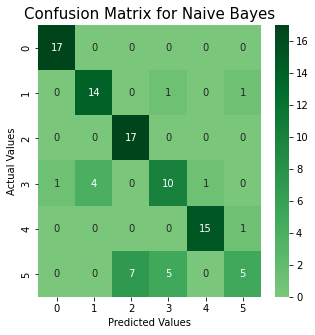

Accuracy of the Naive Bayes Classifier model in % is: 78.79
              precision    recall  f1-score   support

           A       0.94      1.00      0.97        17
           B       0.78      0.88      0.82        16
     Below E       0.71      1.00      0.83        17
           C       0.62      0.62      0.62        16
           D       0.94      0.94      0.94        16
           E       0.71      0.29      0.42        17

    accuracy                           0.79        99
   macro avg       0.78      0.79      0.77        99
weighted avg       0.78      0.79      0.77        99



In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Specifiy the model
model= GaussianNB()


# Fit the model to the data
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(5,5)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens", center=0.6)
plt.title("Confusion Matrix for Naive Bayes", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#To check accuracy
print("Accuracy of the Naive Bayes Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)



###Logistic Regression

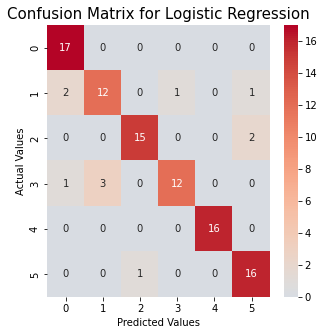

Accuracy of the Logistic Regression model in % is: 88.89
              precision    recall  f1-score   support

           A       0.85      1.00      0.92        17
           B       0.80      0.75      0.77        16
     Below E       0.94      0.88      0.91        17
           C       0.92      0.75      0.83        16
           D       1.00      1.00      1.00        16
           E       0.84      0.94      0.89        17

    accuracy                           0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Specifiy the model
model= LogisticRegression(C = 1e08) #Choose c as large


# Fit the model to the data
model.fit(x_train, y_train)
y_pred =model.predict(x_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(5,5)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", center=0.6)
plt.title("Confusion Matrix for Logistic Regression", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#To check accuracy
print("Accuracy of the Logistic Regression model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

###Decision Tree Classifier

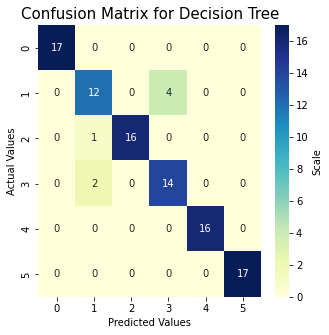

Accuracy of the Decision Tree Classifier model in % is: 92.93
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        17
           B       0.80      0.75      0.77        16
     Below E       1.00      0.94      0.97        17
           C       0.78      0.88      0.82        16
           D       1.00      1.00      1.00        16
           E       1.00      1.00      1.00        17

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train) #Training
y_pred = model.predict(x_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(5,5)
cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True, cmap='Wistia')
sns.heatmap(cm, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix for Decision Tree", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#To check accuracy
print("Accuracy of the Decision Tree Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

###Support Vector Machine Classifier

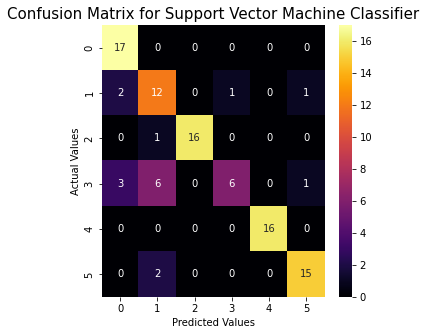

Accuracy of the Support Vector Machine model  in % is: 82.83
              precision    recall  f1-score   support

           A       0.77      1.00      0.87        17
           B       0.57      0.75      0.65        16
     Below E       1.00      0.94      0.97        17
           C       0.86      0.38      0.52        16
           D       1.00      1.00      1.00        16
           E       0.88      0.88      0.88        17

    accuracy                           0.83        99
   macro avg       0.85      0.82      0.82        99
weighted avg       0.85      0.83      0.82        99



In [ ]:
#Support Vector Machine Classifier
#from sklearn import svm
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train) #Training
y_pred = model.predict(x_test)
model.score(x_test,y_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(5,5)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="inferno")
plt.title("Confusion Matrix for Support Vector Machine Classifier", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#To check accuracy
print("Accuracy of the Support Vector Machine model  in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr) 

###Random Forest Classifier

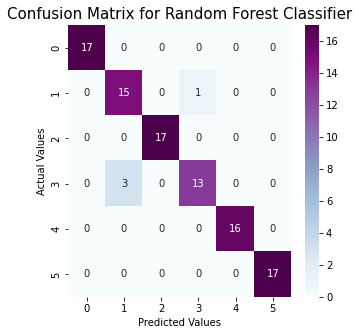

Accuracy of the Random Forest Classifier model in % is: 95.96
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        17
           B       0.83      0.94      0.88        16
     Below E       1.00      1.00      1.00        17
           C       0.93      0.81      0.87        16
           D       1.00      1.00      1.00        16
           E       1.00      1.00      1.00        17

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99



In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train) #Training
y_pred = model.predict(x_test)
model.score(x_test,y_test)



# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(5,5)
cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True, cmap='Wistia')
#sns.heatmap(cm, annot=True,  vmin=0.0, vmax=100.0, fmt='.2f')
sns.heatmap(cm, annot=True, cmap="BuPu")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#To check accuracy
print("Accuracy of the Random Forest Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

###X G Boost Classifier

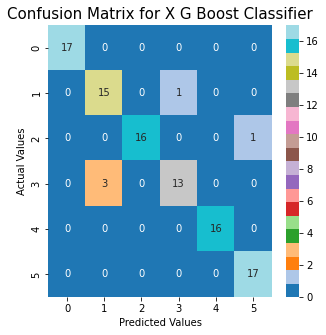

Accuracy of the X G Boost Classifier model in % is: 94.95
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        17
           B       0.83      0.94      0.88        16
     Below E       1.00      0.94      0.97        17
           C       0.93      0.81      0.87        16
           D       1.00      1.00      1.00        16
           E       0.94      1.00      0.97        17

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



In [ ]:
#X G Boost Classifier
from xgboost import XGBClassifier

# Specifiy the model
model= XGBClassifier()


# Fit the model to the data
model.fit(x_train, y_train)
y_pred =model.predict(x_test)

# Now accuracy of model needed to be checked by comparing y_test with y_pred
# Its done with the help classification report .... by importing it from sklearn library

#To print confusion matrix
plt.rcParams["figure.figsize"]=(5,5)
cm=confusion_matrix(y_test, y_pred)
cmap = "tab20"
sns.heatmap(cm, annot=True, cmap=cmap)
plt.title("Confusion Matrix for X G Boost Classifier", fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#To check accuracy
print("Accuracy of the X G Boost Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

##Random Forest Classifier gives maximum accuracy : 95.96 %

##Adding new coloumns to dataset having mean values of each numerical features 

(pH,BOD, EC,DO, TC, FC)

In [ ]:
col1 = data.loc[: , "ph_max":"ph_min"]
data['ph_mean'] = col1.mean(axis=1)

col2 = data.loc[: , "EC_max_µmhos/cm":"EC_min_µmhos/cm"]
data['EC_µmhos/cm_mean'] = col2.mean(axis=1)

col3 = data.loc[: , "DO_max":"DO_min_mg/l"]
data['DO_mean'] = col3.mean(axis=1)

col4 = data.loc[: , "BOD_max_mg/l":"BOD_min_mg/l"]
data['BOD_mean'] = col4.mean(axis=1)

col5 = data.loc[: , "TC_max_MPN/100ml":"TC_min_MPN/100ml"]
data['TC_MPN/100ml_mean'] = col5.mean(axis=1)

col5 = data.loc[: , "FC_max_MPN/100ml":"FC_min_MPN/100ml"]
data['FC_MPN/100ml_mean'] = col5.mean(axis=1)

In [ ]:
data.head()

,Source,Stations,ph_max,ph_min,EC_max_µmhos/cm,EC_min_µmhos/cm,DO_max,DO_min_mg/l,BOD_max_mg/l,BOD_min_mg/l,TC_max_MPN/100ml,TC_min_MPN/100ml,FC_max_MPN/100ml,FC_min_MPN/100ml,CLASS,ph_mean,EC_µmhos/cm_mean,DO_mean,BOD_mean,TC_MPN/100ml_mean,FC_MPN/100ml_mean
0,KADALUNDI RIVER,Oravambrum,7.5,6.5,138,42,8.7,4.0,3.9,0.6,80,12,40,4,A,7.00,90.0,6.35,2.25,46.0,22.0
1,KADALUNDI RIVER,Anakkayam,7.3,6.3,117,57,9.2,5.3,4.4,0.6,72,8,40,4,A,6.80,87.0,7.25,2.50,40.0,22.0
2,KADALUNDI RIVER,Hajiyarappally,7.6,6.5,140,60,8.3,4.6,2.1,0.6,61,20,40,4,A,7.05,100.0,6.45,1.35,40.5,22.0
3,KADALUNDI RIVER,Manikuth,7.4,6.3,117,59,9.0,3.5,2.6,1.2,60,12,28,12,A,6.85,88.0,6.25,1.90,36.0,20.0
4,KADALUNDI RIVER,Kooriyad,7.4,6.5,145,63,8.6,4.0,4.4,0.8,49,12,28,6,A,6.95,104.0,6.30,2.60,30.5,17.0


In [ ]:
data.dtypes

Source                object
Stations              object
ph_max               float64
ph_min               float64
EC_max_µmhos/cm        int64
EC_min_µmhos/cm        int64
DO_max               float64
DO_min_mg/l          float64
BOD_max_mg/l         float64
BOD_min_mg/l         float64
TC_max_MPN/100ml       int64
TC_min_MPN/100ml       int64
FC_max_MPN/100ml       int64
FC_min_MPN/100ml       int64
CLASS                 object
ph_mean              float64
EC_µmhos/cm_mean     float64
DO_mean              float64
BOD_mean             float64
TC_MPN/100ml_mean    float64
FC_MPN/100ml_mean    float64
dtype: object

#Terms in the dataset

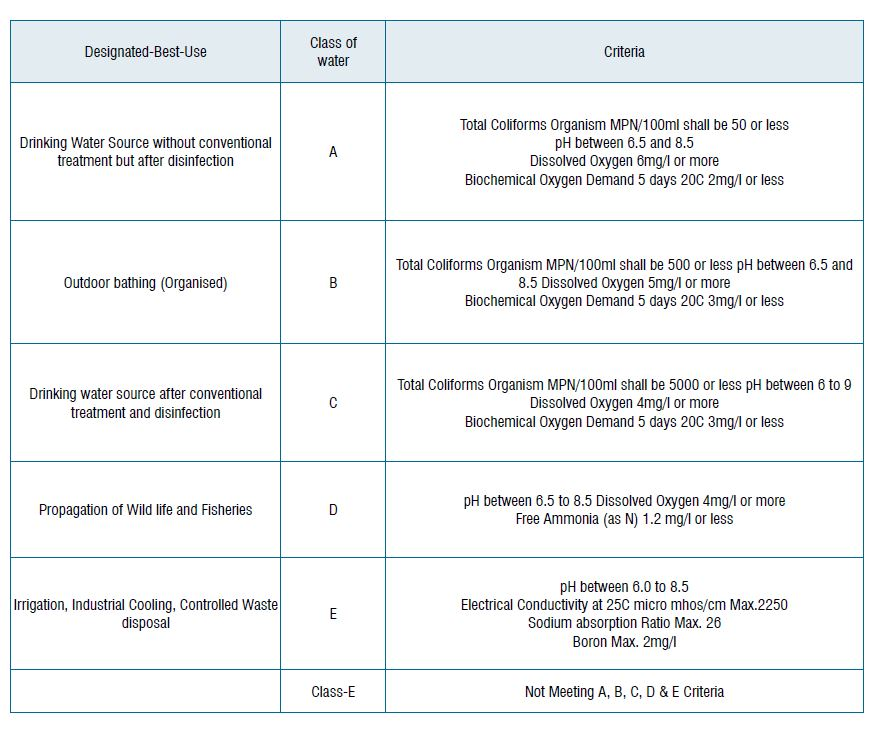

In [ ]:
#Forming an interactive code to get details of pH of a water source
@interact
def summary(CLASS=list(data['CLASS'].value_counts().index)):
  river=data[data['CLASS']==CLASS]
  print("....................................")
  print("List water body/source having some stations belonging to class",CLASS)
  print(river.Source.unique())
  print("....................................")

interactive(children=(Dropdown(description='CLASS', options=('B', 'C', 'Below E', 'D', 'E', 'A'), value='B'), …

In [ ]:
#Forming an interactive code to get details of pH of a water source
@interact
def summary(CLASS=list(data['CLASS'].value_counts().index)):
  river=data[data['CLASS']==CLASS]
  print("....................................")
  print("List water stations belonging to class",CLASS)
  print(river.Stations)
  print("....................................")

interactive(children=(Dropdown(description='CLASS', options=('B', 'C', 'Below E', 'D', 'E', 'A'), value='B'), …

##pH
pH is a scale from 1 to 14 that measures the acidity or alkalinity of a liquid. In the middle of the scale is pure distilled water, with a neutral pH of 7. Anything with a pH below 7 is an acid, and anything with a pH above 7 is an alkali, or base.

 The Environmental Protection Agency (EPA) recommend keeping the pH between 6.5 and 8.5 in drinking water, and many states in the United States choose to enforce these levels.

##EC
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

##DO
Dissolved oxygen refers to the level of free, non-compound oxygen present in water or other liquids. It is an important parameter in assessing water quality because of its influence on the organisms living within a body of water. In limnology (the study of lakes), dissolved oxygen is an essential factor second only to water itself ¹.  A dissolved oxygen level that is too high or too low can harm aquatic life and affect water quality.

Healthy water should generally have dissolved oxygen concentrations above 6.5-8 mg/L and between about 80-120 %.

##BOD
Biochemical oxygen demand (BOD) is the amount of dissolved oxygen (DO) needed (i.e. demanded) by aerobic biological organisms to break down organic material present in a given water sample at certain temperature over a specific time period.

A sample with a 5-day BOD between 1 and 2 mg O/L indicates a very clean water, 3.0 to 5.0 mg O/L indicates a moderately clean water and > 5 mg O/L indicates a nearby pollution source.

##TC and FC
The name "coliform" is given to a whole group of bacteria which can occur in water and indicate potential health problems. They are divided into two groups: TOTAL coliform (TC), which are all of the coliform bacteria, and FECAL coliforms (FC), which are a portion of the TC. Both of these bacteria are closely related inside a large family of bacteria known as the ENTERICS. However, most of the enterics do belong to the TC group, but very few belong to the FC group, which is considered much more serious from the hygiene viewpoint.

There are two criteria within the water quality standard for fecal coliform (FC) The first criterion is a geometric mean less than 100 FC/100mL. The second criterion is less than 10% of the samples exceed 200 FC/mL

## Checking above parameters of water bodies and water stations

In [ ]:
#Forming an interactive code to get details of a water source
@interact
def summary(Source=list(data['Source'].value_counts().index)):
  river=data[data['Source']==Source]

  print("....................................")
  print("Statistics for pH")
  print("Minimum pH of the water body is :",river['ph_min'].min())
  print("Average pH of the water body is :",river['ph_mean'].mean())
  print("Maximum pH of the water body is :",river['ph_max'].max())
  print("....................................")

  print("....................................")
  print("Statistics for EC")
  print("Minimum EC of the water body in µmhos/cm is :",river['EC_min_µmhos/cm'].min())
  print("Average EC of the water body in µmhos/cm is :",river['EC_µmhos/cm_mean'].mean())
  print("Maximum EC of the water body in µmhos/cm is :",river['EC_max_µmhos/cm'].max())
  print("....................................")

  print("....................................")
  print("Statistics for DO")
  print("Minimum DO of the water body in mg/l is :",river['DO_min_mg/l'].min())
  print("Average DO of the water body in mg/l is :",river['DO_mean'].mean())
  print("Maximum DO of the water body in mg/l is : :",river['DO_max'].max())
  print("....................................")

  print("....................................")
  print("Statistics for BOD")
  print("Minimum BOD of the water body in mg/l is :",river['BOD_min_mg/l'].min())
  print("Average BOD of the water body in mg/l is :",river['BOD_mean'].mean())
  print("Maximum BOD of the water body in mg/l is :",river['BOD_max_mg/l'].max())
  print("....................................")

  print("....................................")
  print("Statistics for TC")
  print("Minimum TC of the water body in mg/l is :",river['TC_min_MPN/100ml'].min())
  print("Average TC of the water body in mg/l is :",river['TC_MPN/100ml_mean'].mean())
  print("Maximum TC of the water body in mg/l is :",river['TC_max_MPN/100ml'].max())

  print("....................................")
  print("Statistics for FC")
  print("Minimum FC of the water body in MPN/100ml is :",river['FC_min_MPN/100ml'].min())
  print("Average FC of the water body in MPN/100ml is :",river['FC_MPN/100ml_mean'].mean())
  print("Maximum FC of the water body in MPN/100ml is :",river['FC_max_MPN/100ml'].max())
  print("....................................")

interactive(children=(Dropdown(description='Source', options=('BHARATHAPUZHA', 'PAMBA RIVER', 'MANIMALA RIVER'…

In [ ]:
#Forming an interactive code to get details of pH of a water station
@interact
def summary(Stations=list(data['Stations'].value_counts().index)):
  river=data[data['Stations']==Stations]
  
  print("....................................")
  print("Statistics for pH")
  print("Minimum pH of the water station is :",river['ph_min'].min())
  print("Average pH of the water station is :",river['ph_mean'].mean())
  print("Maximum pH of the water station is :",river['ph_max'].max())
  print("....................................")

  print("....................................")
  print("Statistics for EC")
  print("Minimum EC of the water station in µmhos/cm is :",river['EC_min_µmhos/cm'].min())
  print("Average EC of the water station in µmhos/cm is :",river['EC_µmhos/cm_mean'].mean())
  print("Maximum EC of the water station in µmhos/cm is :",river['EC_max_µmhos/cm'].max())
  print("....................................")

  print("....................................")
  print("Statistics for DO")
  print("Minimum DO of the water station in mg/l is :",river['DO_min_mg/l'].min())
  print("Average DO of the water station in mg/l is :",river['DO_mean'].mean())
  print("Maximum DO of the water station in mg/l is : :",river['DO_max'].max())
  print("....................................")

  print("....................................")
  print("Statistics for BOD")
  print("Minimum BOD of the water station in mg/l is :",river['BOD_min_mg/l'].min())
  print("Average BOD of the water station in mg/l is :",river['BOD_mean'].mean())
  print("Maximum BOD of the water station in mg/l is :",river['BOD_max_mg/l'].max())
  print("....................................")

  print("....................................")
  print("Statistics for TC")
  print("Minimum TC of the water station in MPN/100ml is :",river['TC_min_MPN/100ml'].min())
  print("Average TC of the water station in MPN/100ml is :",river['TC_MPN/100ml_mean'].mean())
  print("Maximum TC of the water station in MPN/100ml is :",river['TC_max_MPN/100ml'].max())
  print("....................................")

  print("....................................")
  print("Statistics for FC")
  print("Minimum FC of the water station in MPN/100ml is :",river['FC_min_MPN/100ml'].min())
  print("Average FC of the water station in MPN/100ml is :",river['FC_MPN/100ml_mean'].mean())
  print("Maximum FC of the water station in MPN/100ml is :",river['FC_max_MPN/100ml'].max())
  print("....................................")

interactive(children=(Dropdown(description='Stations', options=('Pazhassi\xa0\xa0', 'Vandithadam\xa0\xa0', 'Or…

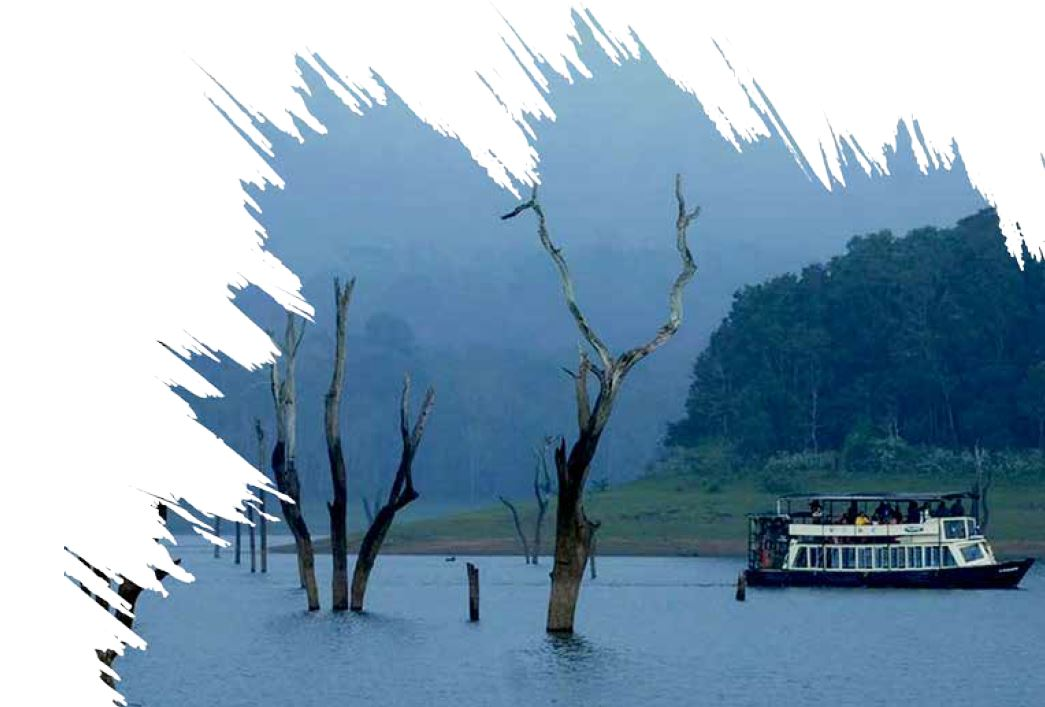